#  Install package

In [1]:
# ! pip install pyvis
# ! pip install networkx
# ! pip install openai

# Import package

In [22]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output

import base64

# Define Solution class
Please run the following cell to define the functions

In [3]:
%load_ext autoreload
%autoreload 2

import LLM_Cat_Constants as constants
import helper

from LLM_Cat_kernel import Solution

# Demonstration Cases

## Input task and data desciption

In [4]:
# isReview = True
isReview = False

In [5]:
task_name ='Census_map'
TASK = r'''1. Create a map to show the Census block group population. The location is Centre County, PA, USA. 
2. Carefuly design the map, make it beautify. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LLM-Cat".
3. The map dimension is A4.
4. You need to design beautify color schemes.
'''

DATA_LOCATIONS = [
    """Population file, GeoPackage format: D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\centre_county_CBG.gpkg. The population is in the 'totalpopulation' column. The map projection is Lambert Conformal Conic, EPSG 6564, StatePlane Pennsylvania South.
    """
]

save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
# model=r"gpt-4"
# model = r'gpt-4-turbo-preview'
model = r'gpt-4-turbo'
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional cartographer and programmer good at Python. You have worked on cartography more than 20 years, and know every detail and pitfall when visulizing spatial data and coding. You know well how to set up workflows for cartography tasks. You have significant experence on visualizing spatial data and graph theory. You are also experienced on generating map using Matplotlib, GeoPandas and other interative Python packages, such as Plotly.
 

Your task: Generate a graph (data structure) only, whose nodes are a series of consecutive steps to make a map, including visualize the data, add map element such as title, legend, scalebar, label, and annotaion:  
 1. Create a map to show the Census block group population. The location is Centre County, PA, USA. 
2. Carefuly design the map, make it beautify. The title, north arrow, scalebar, legend, and designer are needed. The designer is "LLM-Cat".
3. The map dimension is A4.
4. You need to design b

## Get graph code from GPT API

In [6]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# 1. Load Census block group (CBG) population data
G.add_node("CBG_population_path", node_type="data", data_path="D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg", description="Path to the Census Block Group population data")
G.add_node("load_CBG_data", node_type="operation", description="Load Census Block Group data")
G.add_edge("CBG_population_path", "load_CBG_data")
G.add_node("CBG_population_gdf", node_type="data", description="Census Block Group GeoDataFrame")
G.add_edge("load_CBG_data", "CBG_population_gdf")

# 2. Project the data
G.add_node("project_CBG_data", node_type="operation", description="Project the CBG data to StatePlane Pennsylvania South, EPSG:6564")
G.add_edge("CBG_population_gdf", "project_CBG_data")
G.add_node("projected_CBG_gdf", node_type="data", description="Projected Census Block Group GeoDataFrame")
G.add_edge("project_CBG_data", "projected_CBG_gdf")

# 3. Design color schemes
G.add_node("design_color_scheme", node_type="operation", description="Design a sequential color scheme for the population range")
G.add_edge("projected_CBG_gdf", "design_color_scheme")
G.add_node("color_scheme", node_type="data", description="Color scheme for population visualization")
G.add_edge("design_color_scheme", "color_scheme")

# 4. Create the map base
G.add_node("create_map_base", node_type="operation", description="Create map base for the Census data visualization")
G.add_edge("projected_CBG_gdf", "create_map_base")
G.add_edge("color_scheme", "create_map_base")
G.add_node("map_base", node_type="data", description="Base map with Census data visualization")
G.add_edge("create_map_base", "map_base")

# 5. Add map elements
# Add Title
G.add_node("add_title", node_type="operation", description="Add title to the map")
G.add_edge("map_base", "add_title")
G.add_node("map_with_title", node_type="data", description="Map with title")
G.add_edge("add_title", "map_with_title")

# Add North Arrow
G.add_node("add_north_arrow", node_type="operation", description="Add north arrow to the map")
G.add_edge("map_with_title", "add_north_arrow")
G.add_node("map_with_north_arrow", node_type="data", description="Map with north arrow")
G.add_edge("add_north_arrow", "map_with_north_arrow")

# Add Scale Bar
G.add_node("add_scale_bar", node_type="operation", description="Add scale bar to the map")
G.add_edge("map_with_north_arrow", "add_scale_bar")
G.add_node("map_with_scale_bar", node_type="data", description="Map with scale bar")
G.add_edge("add_scale_bar", "map_with_scale_bar")

# Add Legend
G.add_node("add_legend", node_type="operation", description="Add legend to the map")
G.add_edge("map_with_scale_bar", "add_legend")
G.add_node("map_with_legend", node_type="data", description="Map with legend")
G.add_edge("add_legend", "map_with_legend")

# Add Designer Credit
G.add_node("add_designer_credit", node_type="operation", description="Add designer credit 'LLM-Cat' to the map")
G.add_edge("map_with_legend", "add_designer_credit")
G.add_node("final_map", node_type="data", description="Final map with all elements, designed by LLM-Cat")
G.add_edge("add_designer_credit", "final_map")

# Export the final result to a GraphML file
G.add_node("export_to_graphml", node_type="operation", description="Export the process graph to a GraphML file")
G.add_edge("final_map", "export_to_graphml")
G.add_node("graphml_file_path", node_type="data", data_path="D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\Census_map\\Census_map.graphml", description="File path for the exported GraphML")
G.add_edge("export_to_graphml", "graphml_file_path")

nx.write_graphml(G, "D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\Census_map\\Census_map.graphml")

## Execute code to generate the solution graph

In [7]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\Census_map.html


## Generate prompts and code for operations (functions)

In [8]:
operations = solution.get_LLM_responses_for_operations(review=isReview)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_CBG_data(CBG_population_path='D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg'):
    # Description: Load Census Block Group data from a GeoPackage file
    CBG_population_gdf = gpd.read_file(CBG_population_path)
    return CBG_population_gdf
import geopandas as gpd

def project_CBG_data(CBG_population_gdf):
    # Description: Project the CBG data to StatePlane Pennsylvania South, EPSG:6564
    projected_CBG_gdf = CBG_population_gdf.to_crs(epsg=6564)
    return projected_CBG_gdf
import numpy as np
import matplotlib.pyplot as plt

def design_color_scheme(projected_CBG_gdf):
    # Description: Design a sequential color scheme for the population range
    population_min, population_max = projected_CBG_gdf['totalpopulation'].min(), projected_CBG_gdf['totalpopulation'].max()
    color_scheme = plt.get_cmap('YlOrRd').reversed()
    # Normalizing the colormap to fit the population range
    norm = plt.Normalize(vmin=population_min, vmax=population_max)
    return color_scheme, norm
import matplotlib.pyplot as plt
import geopandas as gpd

def create_map_base(projected_CBG_gdf, color_scheme):
    # Description: Create map base for the Census data visualization
    fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 size in inches (Approximately)
    base = projected_CBG_gdf.plot(ax=ax, column='totalpopulation', cmap=color_scheme, legend=True, legend_kwds={'label': "Population by Block Group"})
    ax.axis('off')  # Turn off the axis
    return base
import matplotlib.pyplot as plt

def add_title(map_base):
    # Description: Add title to the map
    map_base.set_title("Census Block Group Population in Centre County, PA", fontsize=14, fontweight='bold')
    return map_base
import matplotlib.pyplot as plt

def add_north_arrow(map_with_title):
    # Description: Add north arrow to the map
    x, y, arrow_length = 0.95, 0.95, 0.1
    map_with_title.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                            arrowprops=dict(facecolor='black', width=5, headwidth=15),
                            ha='center', va='center', fontsize=20, xycoords='axes fraction')
    return map_with_title
import matplotlib.pyplot as plt

def add_scale_bar(map_with_north_arrow):
    # Description: Add scale bar to the map
    scalebar_location = (0.1, 0.05)  # Bottom left corner
    scale_length = 1  # 1 km scale bar, adjust as necessary based on actual map scale
    x, y = scalebar_location
    scale_text = f"{scale_length} km"
    # Draw the scale bar as a horizontal line from (x, y) to (x+scale_length, y)
    map_with_north_arrow.plot([x, x+scale_length], [y, y], 'k-', lw=2, transform=plt.gca().transAxes)
    # Add the scale text centered below the scale bar
    map_with_north_arrow.text(x + scale_length / 2, y - 0.02, scale_text, ha='center', va='top', transform=plt.gca().transAxes)
    return map_with_north_arrow
def add_legend(map_with_scale_bar):
    # Description: Add legend to the map
    legend = map_with_scale_bar.get_figure().legend(title="Population by Block Group", loc='lower right')
    map_with_legend = map_with_scale_bar
    return map_with_legend
def add_designer_credit(map_with_legend):
    # Description: Add designer credit 'LLM-Cat' to the map
    designer_text = "Designed by LLM-Cat"
    text_location = (0.1, 0.01)  # Bottom left corner for placing the designer credit
    x, y = text_location
    # Adding designer credit annotation to the map
    map_with_legend.annotate(designer_text, xy=(x, y), xycoords='axes fraction', fontsize=10, ha='left', va='bottom')
    final_map = map_with_legend
    return final_map
def export_to_graphml(final_map):
    # Description: Export the process graph to a GraphML file
    graphml_file_path = "D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\Census_map\\Census_map.graphml"
    nx.write_graphml(G, graphml_file_path)
    return graphml_file_path

## Generate prompts and code for assembly program

In [9]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=isReview)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

def load_CBG_data(CBG_population_path='D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg'):
    CBG_population_gdf = gpd.read_file(CBG_population_path)
    return CBG_population_gdf

def project_CBG_data(CBG_population_gdf):
    projected_CBG_gdf = CBG_population_gdf.to_crs(epsg=6564)
    return projected_CBG_gdf

def design_color_scheme(projected_CBG_gdf):
    population_min, population_max = projected_CBG_gdf['totalpopulation'].min(), projected_CBG_gdf['totalpopulation'].max()
    color_scheme = plt.get_cmap('YlOrRd').reversed()
    norm = plt.Normalize(vmin=population_min, vmax=population_max)
    return color_scheme, norm

def create_map_base(projected_CBG_gdf, color_scheme):
    fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 size in inches
    base = projected_CBG_gdf.plot(ax=ax, column='totalpopulation', cmap=color_scheme, legend=True, legend_kwds={'label': "Population by Block Group"})
    ax.axis('off')
    return ax

def add_title(map_base):
    map_base.set_title("Census Block Group Population in Centre County, PA", fontsize=14, fontweight='bold')
    return map_base

def add_north_arrow(map_with_title):
    x, y, arrow_length = 0.95, 0.95, 0.1
    map_with_title.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                            arrowprops=dict(facecolor='black', width=5, headwidth=15),
                            ha='center', va='center', fontsize=20, xycoords='axes fraction')
    return map_with_title

def add_scale_bar(map_with_north_arrow):
    scalebar_location = (0.1, 0.05)
    scale_length = 1
    x, y = scalebar_location
    scale_text = f"{scale_length} km"
    map_with_north_arrow.plot([x, x+scale_length], [y, y], 'k-', lw=2, transform=plt.gca().transAxes)
    map_with_north_arrow.text(x + scale_length / 2, y - 0.02, scale_text, ha='center', va='top', transform=plt.gca().transAxes)
    return map_with_north_arrow

def add_legend(map_with_scale_bar):
    legend = map_with_scale_bar.get_figure().legend(title="Population by Block Group", loc='lower right')
    map_with_legend = map_with_scale_bar
    return map_with_legend

def add_designer_credit(map_with_legend):
    designer_text = "Designed by LLM-Cat"
    text_location = (0.1, 0.01)
    x, y = text_location
    map_with_legend.annotate(designer_text, xy=(x, y), xycoords='axes fraction', fontsize=10, ha='left', va='bottom')
    final_map = map_with_legend
    return final_map

def assembly_solution():
    CBG_population_gdf = load_CBG_data()
    projected_CBG_gdf = project_CBG_data(CBG_population_gdf)
    color_scheme, _ = design_color_scheme(projected_CBG_gdf)
    map_base = create_map_base(projected_CBG_gdf, color_scheme)
    map_with_title = add_title(map_base)
    map_with_north_arrow = add_north_arrow(map_with_title)
    map_with_scale_bar = add_scale_bar(map_with_north_arrow)
    map_with_legend = add_legend(map_with_scale_bar)
    final_map = add_designer_credit(map_with_legend)
    plt.savefig('D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG_map.pdf')
    plt.show()

assembly_solution()

## Execute assembly code

In [10]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))
solution.all_code = all_code



-------------- Running code (trial # 1/10) --------------




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


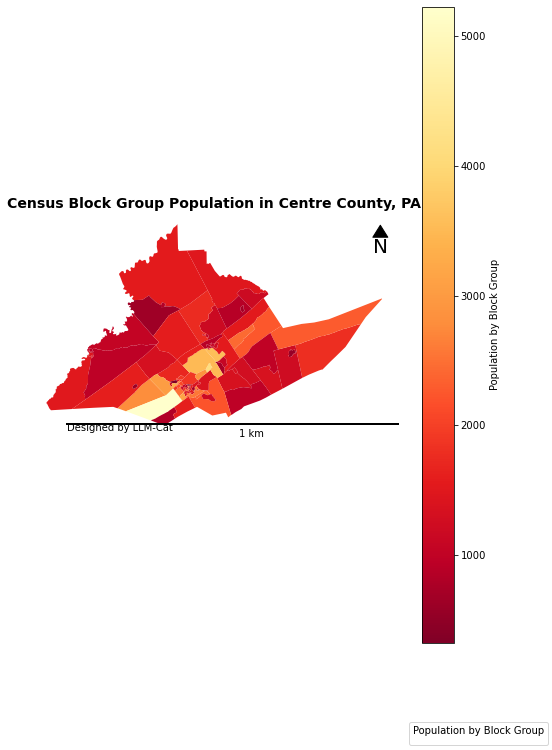



--------------- Done ---------------




import geopandas as gpd

def load_CBG_data(CBG_population_path='D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg'):
    # Description: Load Census Block Group data from a GeoPackage file
    CBG_population_gdf = gpd.read_file(CBG_population_path)
    return CBG_population_gdf
import geopandas as gpd

def project_CBG_data(CBG_population_gdf):
    # Description: Project the CBG data to StatePlane Pennsylvania South, EPSG:6564
    projected_CBG_gdf = CBG_population_gdf.to_crs(epsg=6564)
    return projected_CBG_gdf
import numpy as np
import matplotlib.pyplot as plt

def design_color_scheme(projected_CBG_gdf):
    # Description: Design a sequential color scheme for the population range
    population_min, population_max = projected_CBG_gdf['totalpopulation'].min(), projected_CBG_gdf['totalpopulation'].max()
    color_scheme = plt.get_cmap('YlOrRd').reversed()
    # Normalizing the colormap to fit the population range
    norm = plt.Normalize(vmin=population_min, vmax=population_max)
    return color_scheme, norm
import matplotlib.pyplot as plt
import geopandas as gpd

def create_map_base(projected_CBG_gdf, color_scheme):
    # Description: Create map base for the Census data visualization
    fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 size in inches (Approximately)
    base = projected_CBG_gdf.plot(ax=ax, column='totalpopulation', cmap=color_scheme, legend=True, legend_kwds={'label': "Population by Block Group"})
    ax.axis('off')  # Turn off the axis
    return base
import matplotlib.pyplot as plt

def add_title(map_base):
    # Description: Add title to the map
    map_base.set_title("Census Block Group Population in Centre County, PA", fontsize=14, fontweight='bold')
    return map_base
import matplotlib.pyplot as plt

def add_north_arrow(map_with_title):
    # Description: Add north arrow to the map
    x, y, arrow_length = 0.95, 0.95, 0.1
    map_with_title.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                            arrowprops=dict(facecolor='black', width=5, headwidth=15),
                            ha='center', va='center', fontsize=20, xycoords='axes fraction')
    return map_with_title
import matplotlib.pyplot as plt

def add_scale_bar(map_with_north_arrow):
    # Description: Add scale bar to the map
    scalebar_location = (0.1, 0.05)  # Bottom left corner
    scale_length = 1  # 1 km scale bar, adjust as necessary based on actual map scale
    x, y = scalebar_location
    scale_text = f"{scale_length} km"
    # Draw the scale bar as a horizontal line from (x, y) to (x+scale_length, y)
    map_with_north_arrow.plot([x, x+scale_length], [y, y], 'k-', lw=2, transform=plt.gca().transAxes)
    # Add the scale text centered below the scale bar
    map_with_north_arrow.text(x + scale_length / 2, y - 0.02, scale_text, ha='center', va='top', transform=plt.gca().transAxes)
    return map_with_north_arrow
def add_legend(map_with_scale_bar):
    # Description: Add legend to the map
    legend = map_with_scale_bar.get_figure().legend(title="Population by Block Group", loc='lower right')
    map_with_legend = map_with_scale_bar
    return map_with_legend
def add_designer_credit(map_with_legend):
    # Description: Add designer credit 'LLM-Cat' to the map
    designer_text = "Designed by LLM-Cat"
    text_location = (0.1, 0.01)  # Bottom left corner for placing the designer credit
    x, y = text_location
    # Adding designer credit annotation to the map
    map_with_legend.annotate(designer_text, xy=(x, y), xycoords='axes fraction', fontsize=10, ha='left', va='bottom')
    final_map = map_with_legend
    return final_map
def export_to_graphml(final_map):
    # Description: Export the process graph to a GraphML file
    graphml_file_path = "D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\Census_map\\Census_map.graphml"
    nx.write_graphml(G, graphml_file_path)
    return graphml_file_path
import geopan

In [11]:


all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

solution.all_code = all_code

display(Code(all_code, language='python'))

In [13]:
display(Code(all_code, language='python'))

import geopandas as gpd

def load_CBG_data(CBG_population_path='D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg'):
    # Description: Load Census Block Group data from a GeoPackage file
    CBG_population_gdf = gpd.read_file(CBG_population_path)
    return CBG_population_gdf
import geopandas as gpd

def project_CBG_data(CBG_population_gdf):
    # Description: Project the CBG data to StatePlane Pennsylvania South, EPSG:6564
    projected_CBG_gdf = CBG_population_gdf.to_crs(epsg=6564)
    return projected_CBG_gdf
import numpy as np
import matplotlib.pyplot as plt

def design_color_scheme(projected_CBG_gdf):
    # Description: Design a sequential color scheme for the population range
    population_min, population_max = projected_CBG_gdf['totalpopulation'].min(), projected_CBG_gdf['totalpopulation'].max()
    color_scheme = plt.get_cmap('YlOrRd').reversed()
    # Normalizing the colormap to fit the population range
    norm = plt.Normalize(vmin=population_min, vmax=population_max)
    return color_scheme, norm
import matplotlib.pyplot as plt
import geopandas as gpd

def create_map_base(projected_CBG_gdf, color_scheme):
    # Description: Create map base for the Census data visualization
    fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 size in inches (Approximately)
    base = projected_CBG_gdf.plot(ax=ax, column='totalpopulation', cmap=color_scheme, legend=True, legend_kwds={'label': "Population by Block Group"})
    ax.axis('off')  # Turn off the axis
    return base
import matplotlib.pyplot as plt

def add_title(map_base):
    # Description: Add title to the map
    map_base.set_title("Census Block Group Population in Centre County, PA", fontsize=14, fontweight='bold')
    return map_base
import matplotlib.pyplot as plt

def add_north_arrow(map_with_title):
    # Description: Add north arrow to the map
    x, y, arrow_length = 0.95, 0.95, 0.1
    map_with_title.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                            arrowprops=dict(facecolor='black', width=5, headwidth=15),
                            ha='center', va='center', fontsize=20, xycoords='axes fraction')
    return map_with_title
import matplotlib.pyplot as plt

def add_scale_bar(map_with_north_arrow):
    # Description: Add scale bar to the map
    scalebar_location = (0.1, 0.05)  # Bottom left corner
    scale_length = 1  # 1 km scale bar, adjust as necessary based on actual map scale
    x, y = scalebar_location
    scale_text = f"{scale_length} km"
    # Draw the scale bar as a horizontal line from (x, y) to (x+scale_length, y)
    map_with_north_arrow.plot([x, x+scale_length], [y, y], 'k-', lw=2, transform=plt.gca().transAxes)
    # Add the scale text centered below the scale bar
    map_with_north_arrow.text(x + scale_length / 2, y - 0.02, scale_text, ha='center', va='top', transform=plt.gca().transAxes)
    return map_with_north_arrow
def add_legend(map_with_scale_bar):
    # Description: Add legend to the map
    legend = map_with_scale_bar.get_figure().legend(title="Population by Block Group", loc='lower right')
    map_with_legend = map_with_scale_bar
    return map_with_legend
def add_designer_credit(map_with_legend):
    # Description: Add designer credit 'LLM-Cat' to the map
    designer_text = "Designed by LLM-Cat"
    text_location = (0.1, 0.01)  # Bottom left corner for placing the designer credit
    x, y = text_location
    # Adding designer credit annotation to the map
    map_with_legend.annotate(designer_text, xy=(x, y), xycoords='axes fraction', fontsize=10, ha='left', va='bottom')
    final_map = map_with_legend
    return final_map
def export_to_graphml(final_map):
    # Description: Export the process graph to a GraphML file
    graphml_file_path = "D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\Census_map\\Census_map.graphml"
    nx.write_graphml(G, graphml_file_path)
    return graphml_file_path
import geopan

In [14]:
STOP

NameError: name 'STOP' is not defined

In [19]:
beautify_text_prompt = solution.get_beautify_text_prompt(all_code)
print(beautify_text_prompt)


Your role: A professional cartographer and programmer good at Python. You have worked on cartography more than 20 years, and know every detail and pitfall when visulizing spatial data and coding. You know well how to set up workflows for cartography tasks. You have significant experence on visualizing spatial data and graph theory. You are also experienced on generating map using Matplotlib, GeoPandas and other interative Python packages, such as Plotly. Currently, your job is beautify maps accordings to the given code and the generated map by the code. The purpose of the code is also given.
 
Your task: Observe the given map careful using the viewpoint of an experience cartographer and Python programmer, think about the map design improvement via modifying the code only, and return the modified code.  

Requirements: 
1. Think step by step. First, explain the current defects of the map, and the apporaches to improve them; then return the improved Python code. The explaination should b

Revising the map, trial 1 / 5
```python
'''
Current map issues:
1. The color palette used does not differentiate well enough between high and low population areas.
2. The legend does not accurately reflect the color gradient used in the map; it's too generic.
3. The north arrow placement could be improved to avoid obscuring map data.
4. The scale bar color does not contrast well with the map’s background, reducing visibility.
5. No annotations for block group identifiers; could be useful for specific data referencing.
6. Map margins are too tight; elements are cramped.

Improvement approaches:
1. Use a more diversified color gradient that provides a better visual cue about population density.
2. Enhance the legend to represent a gradient scale corresponding to population levels.
3. Relocate north arrow to a less intrusive location.
4. Change the scale bar color to something more visible against the varied map background.
5. Add annotations for major block groups directly on the map.
6.

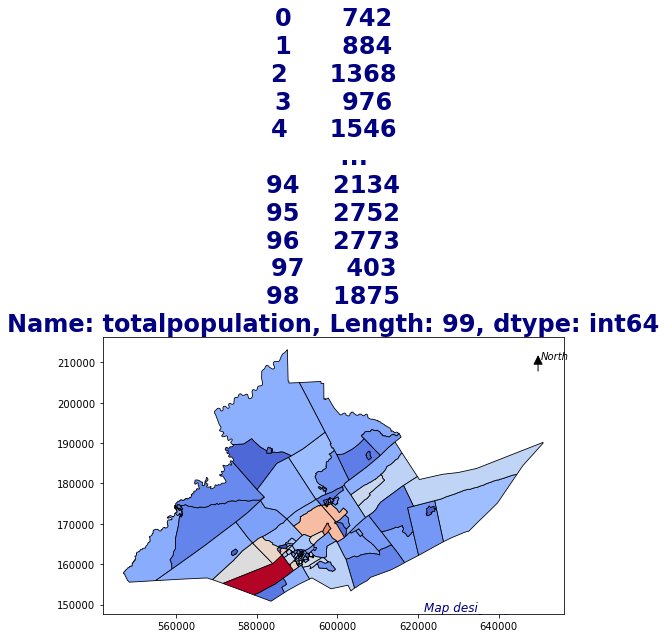

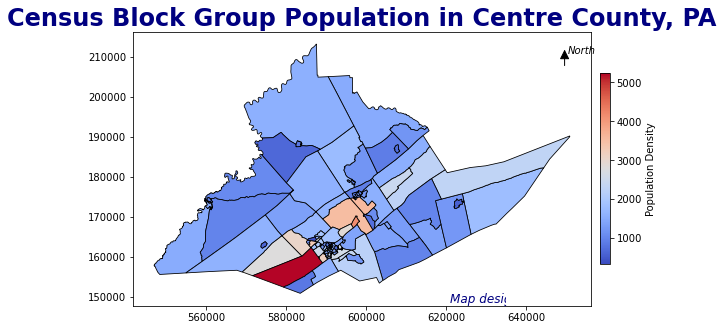



--------------- Done ---------------


Revising the map, trial 2 / 5
```python
'''
Current map issues:
1. The map's title is well positioned and sized but could use a more legible font.
2. The contrast in the map's color scheme is adequate, but it can be optimized for better visualization; especially, the legend needs more distinct colors to show population density variations clearly.
3. The placement of the north arrow could be more subtle, and its design could be enhanced to fit the overall aesthetic of the map.
4. The scale bar, while functionally correct, clashes with the aesthetic by being too stark against the map background.
5. The legend and map annotations (design credits) are not well integrated into the map layout and could distract from the primary visual elements.

Improvement approaches:
1. Change the font of the title to a more professional and visually appealing type.
2. Enhance the color scheme for better differentiation of data ranges and fit the map's aesthetic the

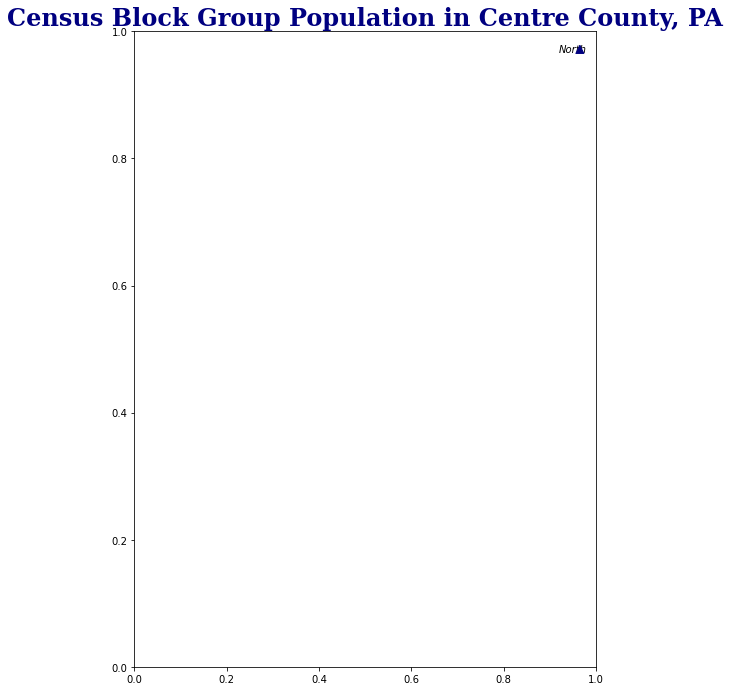

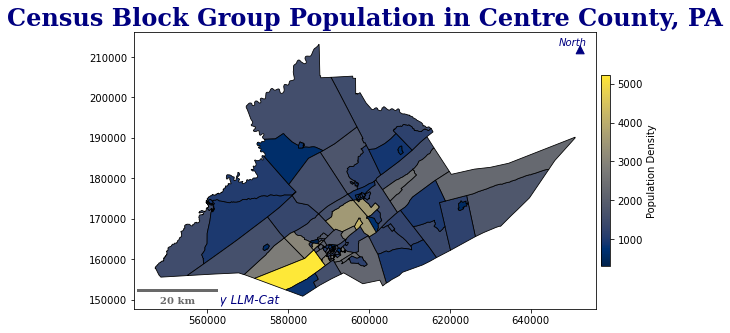



--------------- Done ---------------


Revising the map, trial 3 / 5
```python
'''
Current map issues:
1. The color scheme used (cividis) is perceptually uniform but lacks visual appeal for a wider audience.
2. The title, while improved in size and font, can be made more aesthetically pleasing with better positioning.
3. North arrow and scale bar are functional but could be designed to be more cohesive with the overall map style.
4. The legend is too basic and could benefit from better integration and design.
5. Map border and padding can be enhanced for better presentation.

Improvement strategies:
1. Change the color scheme to something warmer that might be more engaging while still being accessible.
2. Adjust the title position and add subtitles for context or additional information.
3. Design a more artistic north arrow and scale bar that match the map’s styling.
4. Enhance the legend design for better clarity and visual appeal.
5. Refine borders and margins to ensure the map ele

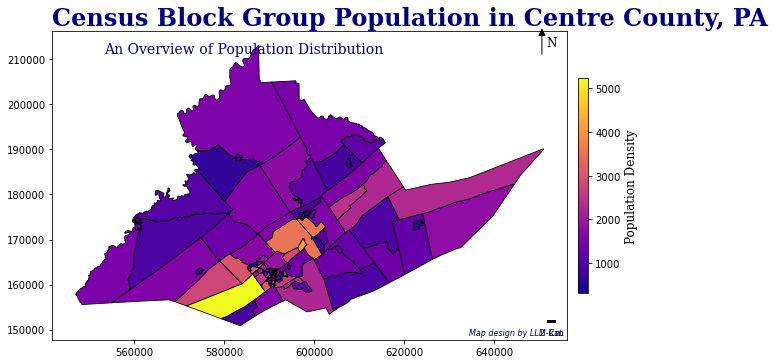



--------------- Done ---------------


Revising the map, trial 4 / 5
```python
'''
Current map issues:
1. The colors chosen (plasma) while superior in terms of data representation, can still be adjusted for general public appeal.
2. The title and subtitle are effectively positioned but might feel crowded due to their proximity.
3. North arrow, though appropriate, could be further enhanced visually to complement the overall aesthetic of the map.
4. Scale bar is functional but the integration with the map's style could be improved.
5. The annotation for the map designer is well-placed, yet could be styled better to be less intrusive.

Improvement strategies:
1. Opt for a slightly altered color scheme that maintains good data visualization but is visually softer.
2. Increase spacing between the title and the subtitle to enhance readability.
3. Improve the visual design of the north arrow to make it feel more integrated with the overall map style.
4. Rework the scale bar for a better sty

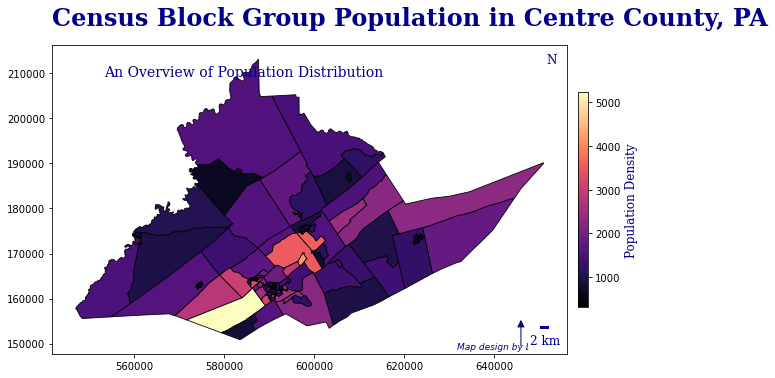



--------------- Done ---------------


Revising the map, trial 5 / 5
```python
'''
Current map issues:
1. The color scheme uses 'magma', which, while rich, could overpower subtle variations in the dataset.
2. The font size and style of the title and subtitles could be refined to improve visibility and readability.
3. North arrow and scale bar, while functional, do not visually align with the overall style and sophistication of the map.
4. The placement and design of the legend and designer annotation seem generic and could be enhanced.

Improvement strategies:
1. Adjust the color scheme to 'viridis' for better luminance gradient and easier interpretation.
2. Use a more elegant serif font with larger sizes for the title and a slightly smaller size for subtitles.
3. Design a custom north arrow and enhance scale bar aesthetics to ensure seamless integration with the map design.
4. Rework the legend and the designer annotation placement for better aesthetic integration and subtlety.

Bel

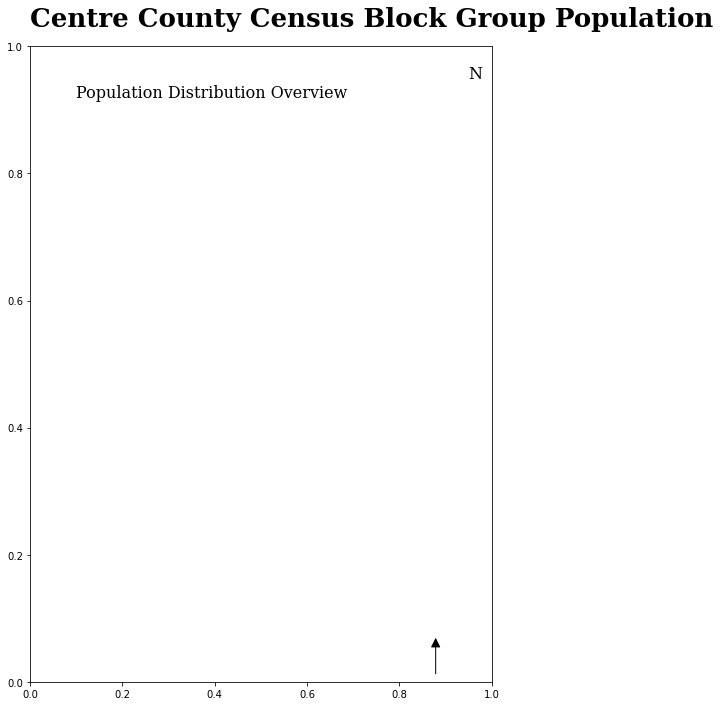

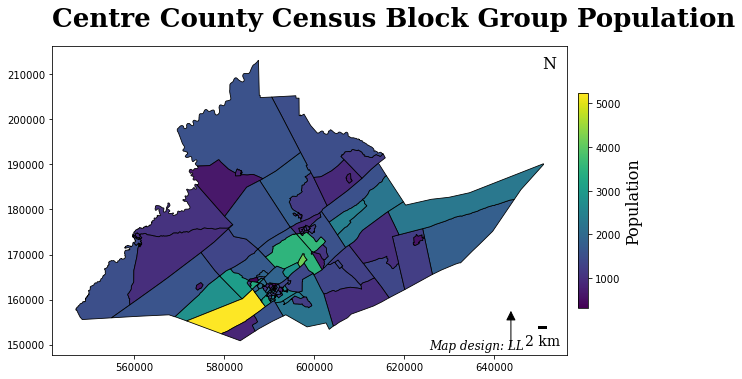



--------------- Done ---------------




import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea
from matplotlib.patches import FancyArrowPatch
from matplotlib.font_manager import FontProperties

# Load geographic data
def load_CBG_data(filepath='D:\\OneDrive_PSU\\OneDrive - The Pennsylvania State University\\Research_doc\\LLM-Cat\\centre_county_CBG.gpkg'):
    return gpd.read_file(filepath)

# Design the color scheme: using 'viridis' for better luminance contrast
def design_color_scheme(gdf, column='totalpopulation'):
    cmap = plt.get_cmap('viridis')  # Changed from 'magma' to 'viridis' for better visual contrast
    norm = plt.Normalize(vmin=gdf[column].min(), vmax=gdf[column].max())
    return cmap, norm

# Create map elements: title, north arrow, scale bar, designer credit
def create_map_elements(ax, gdf, cmap, norm):
    font_title = FontProperties(family='serif', size=26, weight='bold')  # Increase font size for better visibility
    ax.set_title('Centre County Census Block Group Population', fontproperties=font_title, loc='left', pad=20)

    ada = AnchoredDrawingArea(50, 50, 0, 0, loc=4, pad=0.1, frameon=False)
    arrow = FancyArrowPatch((0, 0), (0, 40), mutation_scale=20, arrowstyle='-|>', color='k') # Visually larger arrow
    ada.da.add_artist(arrow)
    ax.add_artist(ada)
    ax.text(0.98, 0.97, 'N', transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=16, fontfamily='serif')

    # Correct the font_properties usage here:
    scalebar = ScaleBar(1, location='lower right', scale_loc='bottom', frameon=True, border_pad=0.5, length_fraction=0.025, font_properties={'size': 14, 'family': 'serif'})
    ax.add_artist(scalebar)

    ax.annotate('Map design: LLM-Cat', xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=12, style='italic', family='serif')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = ax.figure.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.02)
    cbar.set_label('Population', size=16, family='serif')

# Main function to create and save the map
def create_and_save_map():
    gdf = load_CBG_data()
    fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 in inches
    cmap, norm = design_color_scheme(gdf)
    create_map_elements(ax, gdf, cmap, norm)
    gdf.plot(ax=ax, column='totalpopulation', cmap=cmap, norm=norm, linewidth=0.8, edgecolor='k')
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)
    plt.savefig('map_output.png', format='png', dpi=300)
    plt.show()

create_and_save_map()

In [30]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Cat\map_output.png"

# Getting the base64 string


beautify_cnt = 5

for i in range(5):
    
    print(f"Revising the map, trial {i + 1} / {beautify_cnt}")
    
    base64_image = encode_image(image_path)

    solution.ask_LLM_to_beautify_map(map_base64=base64_image, model='gpt-4-turbo')

    all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

    solution.all_code = all_code

display(Code(all_code, language='python'))

In [ ]:
all_code = solution.execute_complete_program(code=solution.all_code, try_cnt=10)

solution.all_code = all_code

display(Code(all_code, language='python'))

# Vision test